In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#membaca file csv dan menampilkan lima records pertama
messages = pd.read_csv('spam_file.csv', encoding='latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#menghilangkan kolom-kolom yang tidak diperlukan
messages.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#renama nama kolom v1 dan v2 menjadi class dan text
messages = messages.rename(columns={'v1': 'class','v2': 'text'})
messages.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#deskripsi data dan redundansinya
messages.groupby('class').describe()
#diketahui, hanya 13.4% (747) pesan pesan spam dari total 5572 records
#beberapa pesan redundant (tampaknya template jawaban)

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [6]:
messages['length'] = messages['text'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BE7D8BAC8>,
      dtype=object)

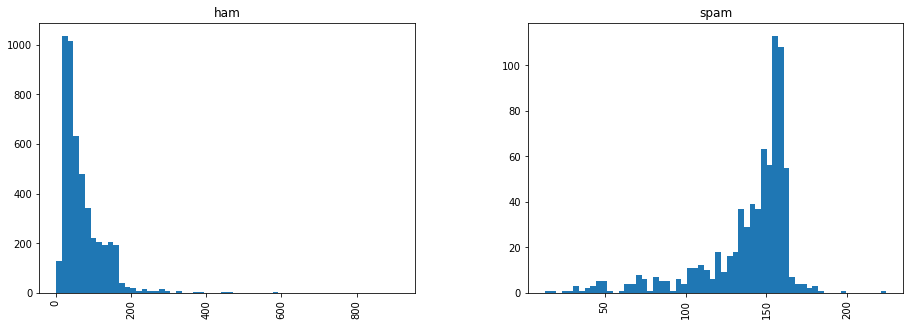

In [7]:
messages.hist(column='length',by='class',bins=60, figsize=(15,5))
#melihat korelasi antara panjang pesan dan klasifikasi nya sebagai spam atau bukan
#spam memiliki kecenderungan pesannya lebih panjang dibandingkan ham

In [8]:
def process_text(text):
    #1 menghilangkan punctuation (tanda baca)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #2 menghilangkan stopwords bahasa Inggris (kata-kata yang tdk memiliki makna)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    #3 memasukkan kata-kata yang sudah dibersihkan
    return clean_words

In [9]:
#menampilkan hasil filter punctuation dan stopwords di atas
messages['text'].apply(process_text).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [10]:
#memilah data menjadi train test (70%) dan test set (30%)
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'],messages['class'],test_size=0.30)

In [11]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), #mengubah fitur teks menjadi representasi vector
    ('tfidf',TfidfTransformer()), #konversi bobot skor TF-IDF
    ('classifier',MultinomialNB()) #training pada TF-IDF vector dengan Naive Bayes classifier
])

In [12]:
pipeline.fit(msg_train,class_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x0000021BF40D8488>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [13]:
predictions = pipeline.predict(msg_test)

In [14]:
print(classification_report(class_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1444
        spam       1.00      0.69      0.82       228

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.90      1672
weighted avg       0.96      0.96      0.95      1672



[[1444    0]
 [  71  157]]


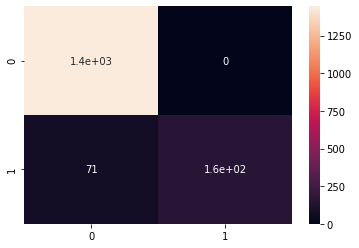

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(class_test,predictions))

In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.5f' % accuracy_score(class_test,predictions))

Accuracy: 0.95754


In [17]:
pipeline.predict(["PRIVATE! Your 2003 Account Statement for 07815296484 shows 800 un-redeemed S.I.M. points. Call 08718738001 Identifier Code 41782 Expires 18/11/04 "])

array(['spam'], dtype='<U4')

In [18]:
pipeline.predict(["Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"])

array(['spam'], dtype='<U4')

In [19]:
pipeline.predict(["U don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers."])

array(['ham'], dtype='<U4')

In [20]:
pipeline.predict(["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"])

array(['ham'], dtype='<U4')